In [705]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


In [706]:
X = pd.read_csv('data_assignment3.csv')
phi = X['phi']
psi = X['psi']

1. a)

Text(0.5, 0, 'Psi')

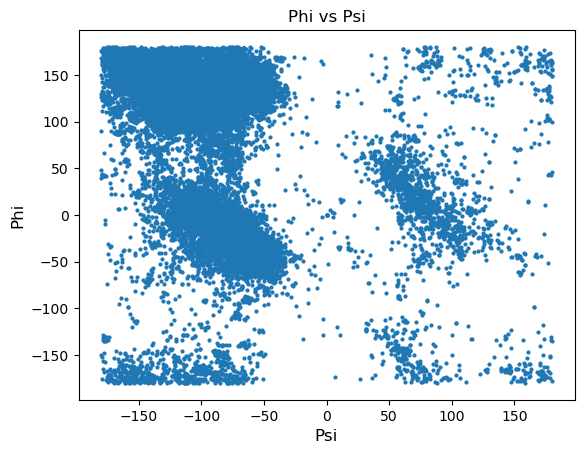

In [707]:
plt.scatter(phi,psi,s=4)
plt.title('Phi vs Psi')
plt.ylabel('Phi', fontsize=12)
plt.xlabel('Psi', fontsize=12)

1. b)

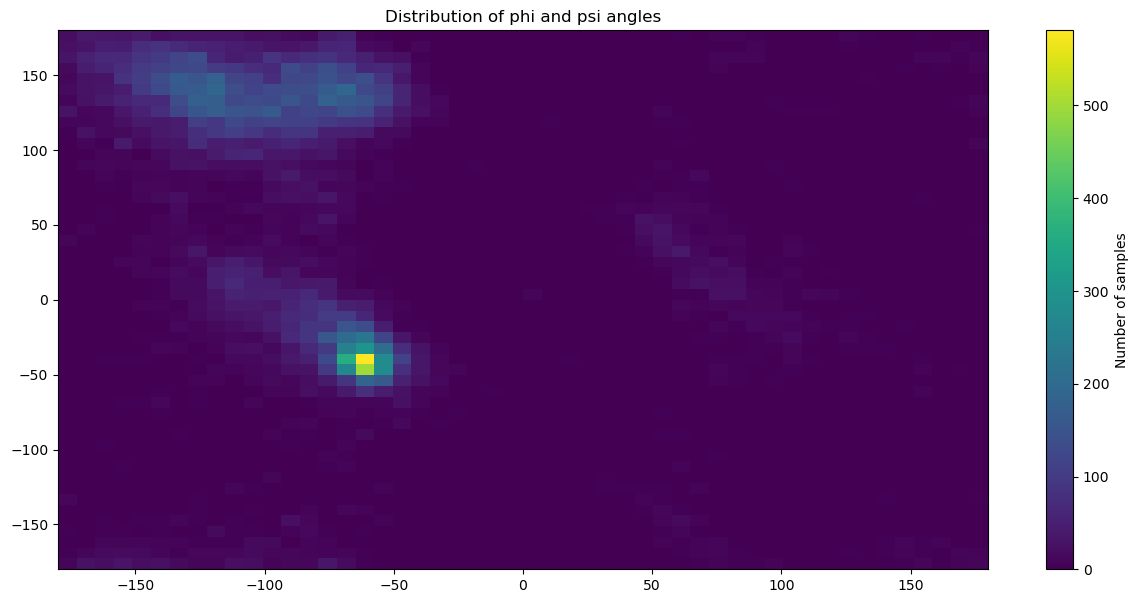

In [708]:
plt.figure(figsize=(15, 7))

plt.hist2d(phi,psi,bins=50,cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')
#dubbelkolla namn på denna

# Add title and labels to plot.

plt.title('Distribution of phi and psi angles')

# Show the
plt.show()

In [709]:
print(X)

      residue name  position chain         phi         psi
0              LYS        10     A -149.312855  142.657714
1              PRO        11     A  -44.283210  136.002076
2              LYS        12     A -119.972621 -168.705263
3              LEU        13     A -135.317212  137.143523
4              LEU        14     A -104.851467   95.928520
...            ...       ...   ...         ...         ...
29364          GLY       374     B -147.749557  155.223562
29365          GLN       375     B -117.428541  133.019506
29366          ILE       376     B -113.586448  112.091970
29367          ASN       377     B -100.668779  -12.102821
29368          LYS       378     B -169.951240   94.233680

[29369 rows x 5 columns]


1. c)

In [710]:
#transforming the data
xPhi = phi.tolist()
xPsi = psi.tolist()
phiPlus = X['phi'].tolist()
psiPlus = X['psi'].tolist()
res = X['residue name'].tolist()
pos = X['position'].tolist()
chain = X['chain'].tolist()

for i in range(len(phiPlus)):
    phiPlus[i] += 360
    psiPlus[i] += 360

topLeftDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phi, 'psi': psiPlus})
topRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psiPlus})

bottomRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psi})
bottomLeftDF = X

X4 = pd.merge(pd.merge(bottomRightDF, bottomLeftDF, how='outer'), pd.merge(topLeftDF, topRightDF,how='outer'),how='outer')


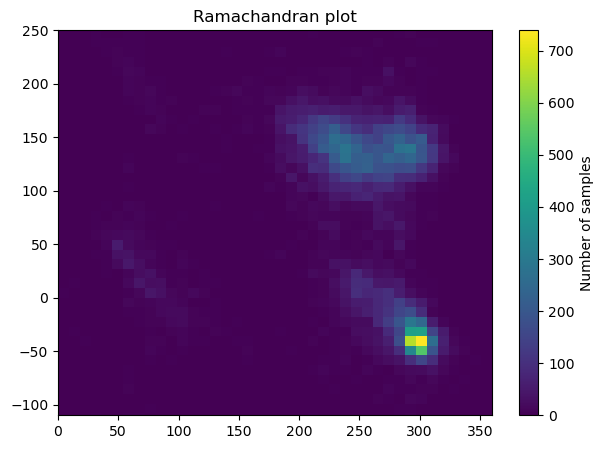

In [711]:
#ramachandran plot


# Set size of the figure
plt.figure(figsize=(7,5))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(X4['phi'], X4['psi'], bins=80, cmap='viridis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('Ramachandran plot')

# Show the plot.
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

2. a) 
To evaluate which value of K that gives us the best clustering we used the Elbow method. Where the steepest drop off would indicate the best k-value.
Our elbow graph indicates that k=2 is the preferred k-value. In our code this would mean k*4 since we have 4 quadrants. 8 clusters would then be the preferred number in the large merged graph which is equivalent to 2 clusters in the graph plotted further down.
The image added below is a visual representation of the entire ramachandran plot.

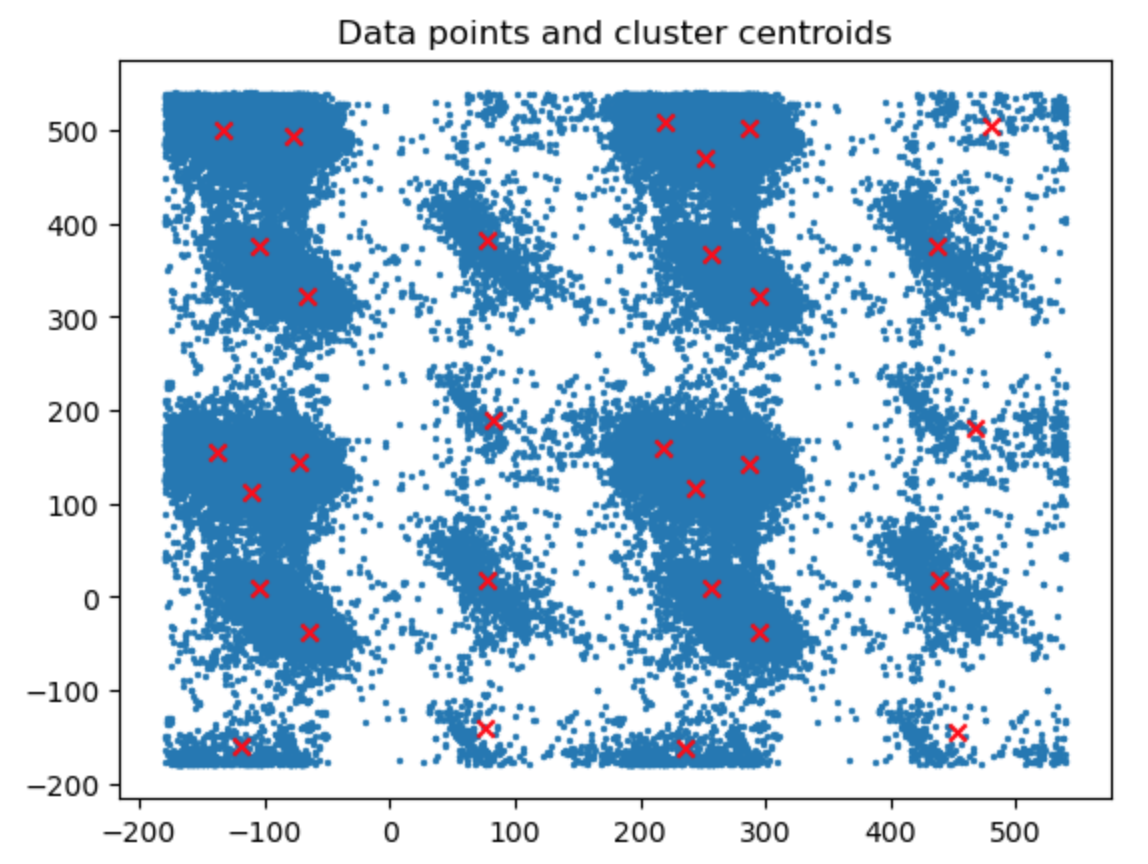

In [712]:
del X4['residue name']
del X4['position']
del X4['chain']

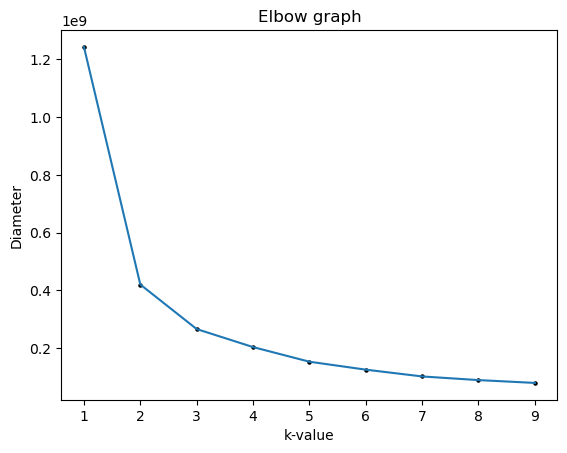

In [713]:
#Plot Elbow graph

k_values = range (1,10)
tot_diam=[]

# Perform K-Means clustering    
# Specify the number of k and fit the data X
# k*4 because we have 4 quadrants
for k in k_values:
    kmeans = KMeans(n_clusters=k*4, random_state=4, n_init=10).fit(X4)
    tot_diam.append(kmeans.inertia_)

plt.title("Elbow graph")
plt.ylabel("Diameter")
plt.xlabel("k-value")
plt.scatter(k_values, tot_diam, c='k', s=5)
plt.plot(k_values, tot_diam)
plt.show()

In [714]:
# Get the cluster centroids
print(kmeans.cluster_centers_)

[[ -73.04771597  145.90325928]
 [ 286.50481683  149.94272735]
 [ 289.0751109   500.47250147]
 [-105.51746669  460.94335407]
 [-104.25379457    6.4081088 ]
 [ 299.55551083  -43.73147041]
 [ 295.60626347  321.46122328]
 [ -64.45999769  321.45412082]
 [ 239.45143815  503.38202367]
 [-118.17703337 -160.5309311 ]
 [ 437.24295596  375.12963648]
 [  77.10762609   18.38631665]
 [ 213.37515516  164.60081112]
 [ 438.04139491   18.49002169]
 [  76.55276067  379.227067  ]
 [ 245.74575127   19.55983209]
 [ 234.48386948  128.56081872]
 [-114.24770055  503.68592938]
 [-127.09774152  129.47306179]
 [ 235.5882334  -161.33488455]
 [ -69.05481695  499.99382652]
 [ 481.07156256  504.40524943]
 [  75.56400809 -141.03819516]
 [ 279.19254877  -17.0361832 ]
 [ -64.3709676   -38.04335704]
 [-103.33842375  365.96622338]
 [ -92.05711996  102.69118274]
 [  81.25893559  188.50928602]
 [ 453.71202193 -145.41366635]
 [ 467.44162702  181.64387389]
 [ 197.01427138  509.44403273]
 [ 256.03605491  365.24802651]
 [ 255.4

In [715]:
print(kmeans.labels_)

[12  1 19 ... 32 31 30]


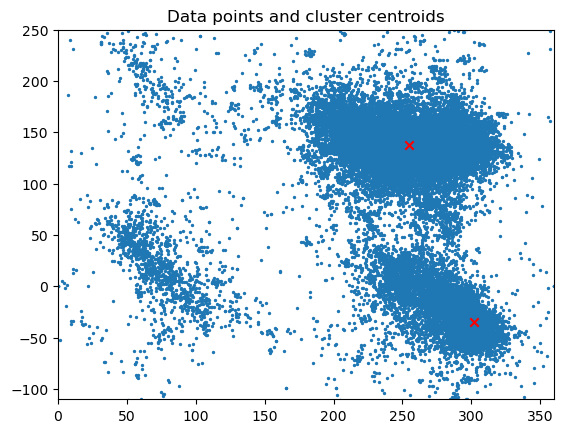

In [716]:
#Plotting the k that is recommended from the Elbow graph
#Plotting the cluster centers and the data points
kmeans = KMeans(n_clusters=8, random_state=4,n_init=28).fit(X4)
plt.scatter(X4['phi'], X4['psi'], s=2)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

2. b)
Evaluation of the k-method:
We can see that using this method there are two clusters on the left side of the graph that are not taken into consideration. We can include these clusters by increasing the value of k, but this will lead to the two big clusters on the right side being divided into smaller circular clusters, which is not ideal either. The k-means method of classification is bad at characterizing non-spherical clusters, which makes it sub-optimal for this specific dataset.
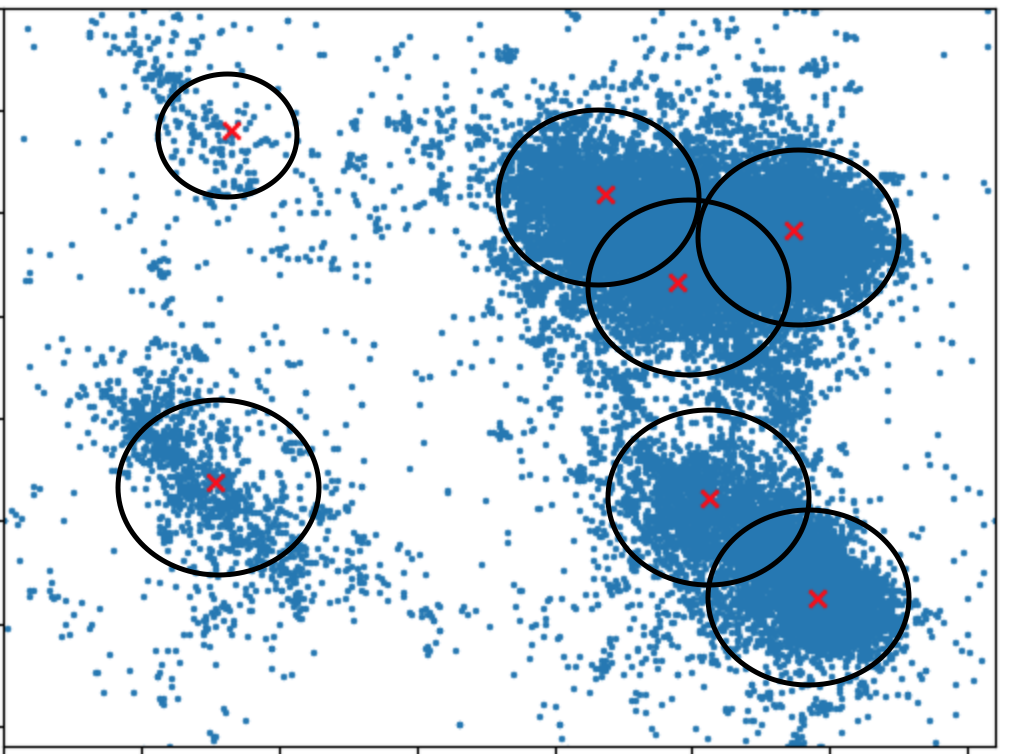

3. a) 

I)
Since we have a very large dataset we thought that the minimum number of samples in the neighborhood for a point to be considered as a core point should be around 100. After we had calculated epsilon we chose to manually try different values for min_samples until we found a value we believed was visually satisfying. Thus we ended up with min_samples=115.

II)
To calculate the maximum distance between two samples belonging to the same neighborhood we used a k-distance graph. After we plotted the graph we limited the x- and y-axis according to where we believed the slope to be the steepest. We believe that the steepest point has a y-coordinate that is approximately 13.5. Thus we chose eps=13.5

3. b)

In [717]:
# Compute DBSCAN
db = DBSCAN(eps=13.5, min_samples=115).fit(X4)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=13.5, min_samples=115)
Estimated number of clusters: 18
Estimated number of noise points: 7065


In [718]:
X4=X4.to_numpy()

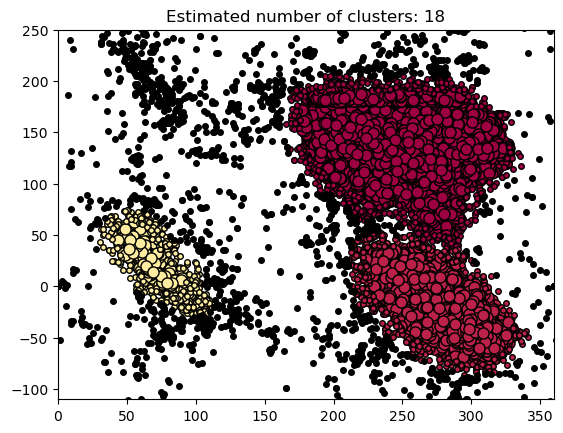

In [719]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X4[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='black', markersize=8)

    xy = X4[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='black', markersize=4)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

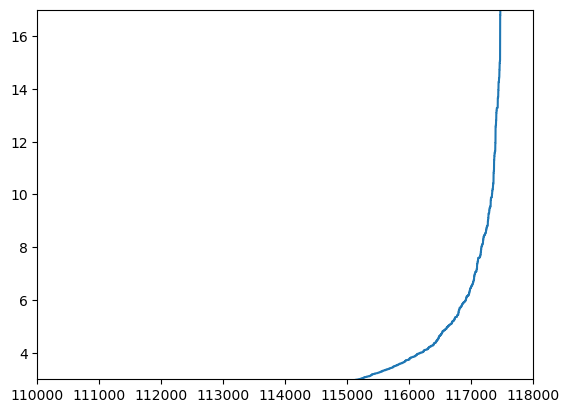

In [720]:
neighbors = NearestNeighbors(n_neighbors=80)
neighbors_fit = neighbors.fit(X4)
distances, indices = neighbors_fit.kneighbors(X4)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.xlim([110000, 118000]) 
plt.ylim([3, 17])
plt.show()

3. c)
7065 outliers where found. See calculations and bar chart below.

In [721]:
#X2 contains all the different amino acids
#this was used to find out what amino acids existed in this dataset
X2= X.drop_duplicates(subset=['residue name'], keep='last')['residue name'].tolist()
X2

['CYS',
 'TYR',
 'GLU',
 'SER',
 'TRP',
 'ASP',
 'ARG',
 'HIS',
 'PRO',
 'THR',
 'ALA',
 'VAL',
 'LEU',
 'PHE',
 'MET',
 'GLY',
 'GLN',
 'ILE',
 'ASN',
 'LYS']

(-110.0, 250.0)

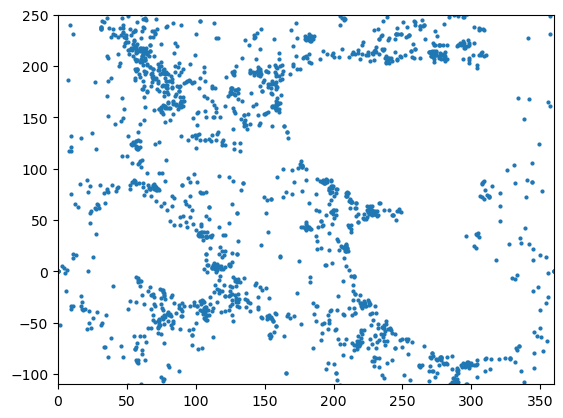

In [722]:
#noise plot

xy = X4[class_member_mask & ~core_samples_mask]

noise =X4[class_member_mask]
plt.scatter(noise[:, 0], noise[:, 1], s=4)

plt.xlim([0, 360]) 
plt.ylim([-110, 250])


In [723]:
xPhi = phi.tolist()
xPsi = psi.tolist()
phiPlus = X['phi'].tolist()
psiPlus = X['psi'].tolist()
res = X['residue name'].tolist()
pos = X['position'].tolist()
chain = X['chain'].tolist()

In [724]:
for i in range(len(phiPlus)):
    phiPlus[i] += 360
    psiPlus[i] += 360

#create dataframes for all four quadrants
topLeftDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phi, 'psi': psiPlus})
topRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psiPlus})

bottomRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psi})
bottomLeftDF = X
# merge all the dataframes
X5 = pd.merge(pd.merge(bottomRightDF, bottomLeftDF, how='outer'), pd.merge(topLeftDF, topRightDF,how='outer'),how='outer')


In [725]:
phi = X5['phi'].tolist()
psi = X5['psi'].tolist()

X5 = X5[(X5['phi'].isin(noise[:, 0])) & (X5['psi'].isin(noise[:,1]))]

In [726]:
X6 = X5[(X5['phi'] <= 360) & (X5['phi'] >= 0)]
X5 = X5[(X5['psi'] <= 240) & (X5['psi'] >= -120)]
  
X5

,residue name,position,chain,phi,psi
104,GLY,115,A,470.288648,-31.537123
231,GLY,115,B,460.758386,-40.349971
242,GLY,126,B,465.934082,2.490071
293,GLU,49,C,228.217863,-70.626214
296,GLY,52,C,185.758648,-41.454436
...,...,...,...,...,...
116914,GLY,172,A,428.435970,184.468839
117155,GLY,52,B,413.190913,216.506909
117275,GLY,172,B,427.653505,180.714774
117313,GLY,210,B,538.587509,190.750988


In [727]:
#amount of outliers
len(noise[:, 0].tolist())

7065

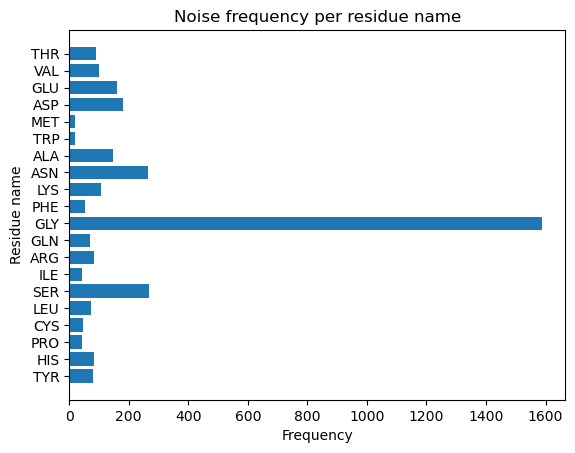

In [728]:
res = list(set(X5['residue name']))

freq = []
for r in res:
    freq.append(len(X5[X5['residue name'] == r]))
objects = tuple(res)
y_pos = np.arange(len(objects))
performance = freq
plt.barh(y_pos, performance, align='center', alpha=1, )
plt.yticks(y_pos, objects)
plt.ylabel('Residue name')
plt.xlabel('Frequency')
plt.title('Noise frequency per residue name')

plt.show()

3. d)
The pros and cons comparing DBSCAN and K-means for clustering:
Pros for DBSCAN:

Cons for DBSCAN:

Pros for K-means:

Cons for K-means:

4. 

In [729]:
#X5.drop(X5[X5['residue name'] == ['PRO']])
#X5.drop(list(X5.filter(regex ='PRO')), axis=1, inplace=True)
#np.query("'residue name' == 'PRO'",inplace=True)
#X5[X5['residue name'].str.contains("PRO")]
X7=X5[~(X5['residue name']=="PRO")].index
X5.drop(X7,inplace = True)
print(X5)
#X5= X.drop_duplicates(subset=['residue name'], keep='last')['residue name'].tolist()
#X5
#new = X4.loc[df['residue name']=='PRO',['phi', 'psi']]


       residue name  position chain         phi         psi
2651            PRO        55     A  309.992332  -96.774676
3794            PRO        55     F  311.454290   74.516388
4986            PRO        37     A  334.798400  -72.995273
5230            PRO        37     B  334.740455  -72.895531
6286            PRO       186     B  307.994010   84.614784
6527            PRO       186     D  308.008264   85.723231
6769            PRO       186     F  320.560050   76.460732
7012            PRO       186     H  315.248717   83.163659
8340            PRO        25     A  268.972069 -106.769067
8739            PRO        25     A  273.828500 -102.866383
9670            PRO        25     A  306.646141   73.649146
10468           PRO        25     A  313.261612  -94.999045
11272           PRO       321     A  369.549660  -36.608023
11995           PRO       321     B  377.366118  -36.541512
15724           PRO        26     I  320.822774   49.447381
16490           PRO       397     L  537

In [730]:
#X5.drop(list(X5.filter(regex ='PRO')), axis=1, inplace=True)

X5

,residue name,position,chain,phi,psi
2651,PRO,55,A,309.992332,-96.774676
3794,PRO,55,F,311.454290,74.516388
4986,PRO,37,A,334.798400,-72.995273
5230,PRO,37,B,334.740455,-72.895531
6286,PRO,186,B,307.994010,84.614784
6527,PRO,186,D,308.008264,85.723231
6769,PRO,186,F,320.560050,76.460732
7012,PRO,186,H,315.248717,83.163659
8340,PRO,25,A,268.972069,-106.769067
8739,PRO,25,A,273.828500,-102.866383


In [734]:
# Compute DBSCAN
db = DBSCAN(eps=13.5, min_samples=115).fit(X5)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

ValueError: could not convert string to float: 'PRO'

In [733]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X5[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='black', markersize=8)

    xy = X5[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='black', markersize=4)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

ValueError: Item wrong length 117476 instead of 43.